In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
import sqlite3
conn=sqlite3.connect('inventory.db')

df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


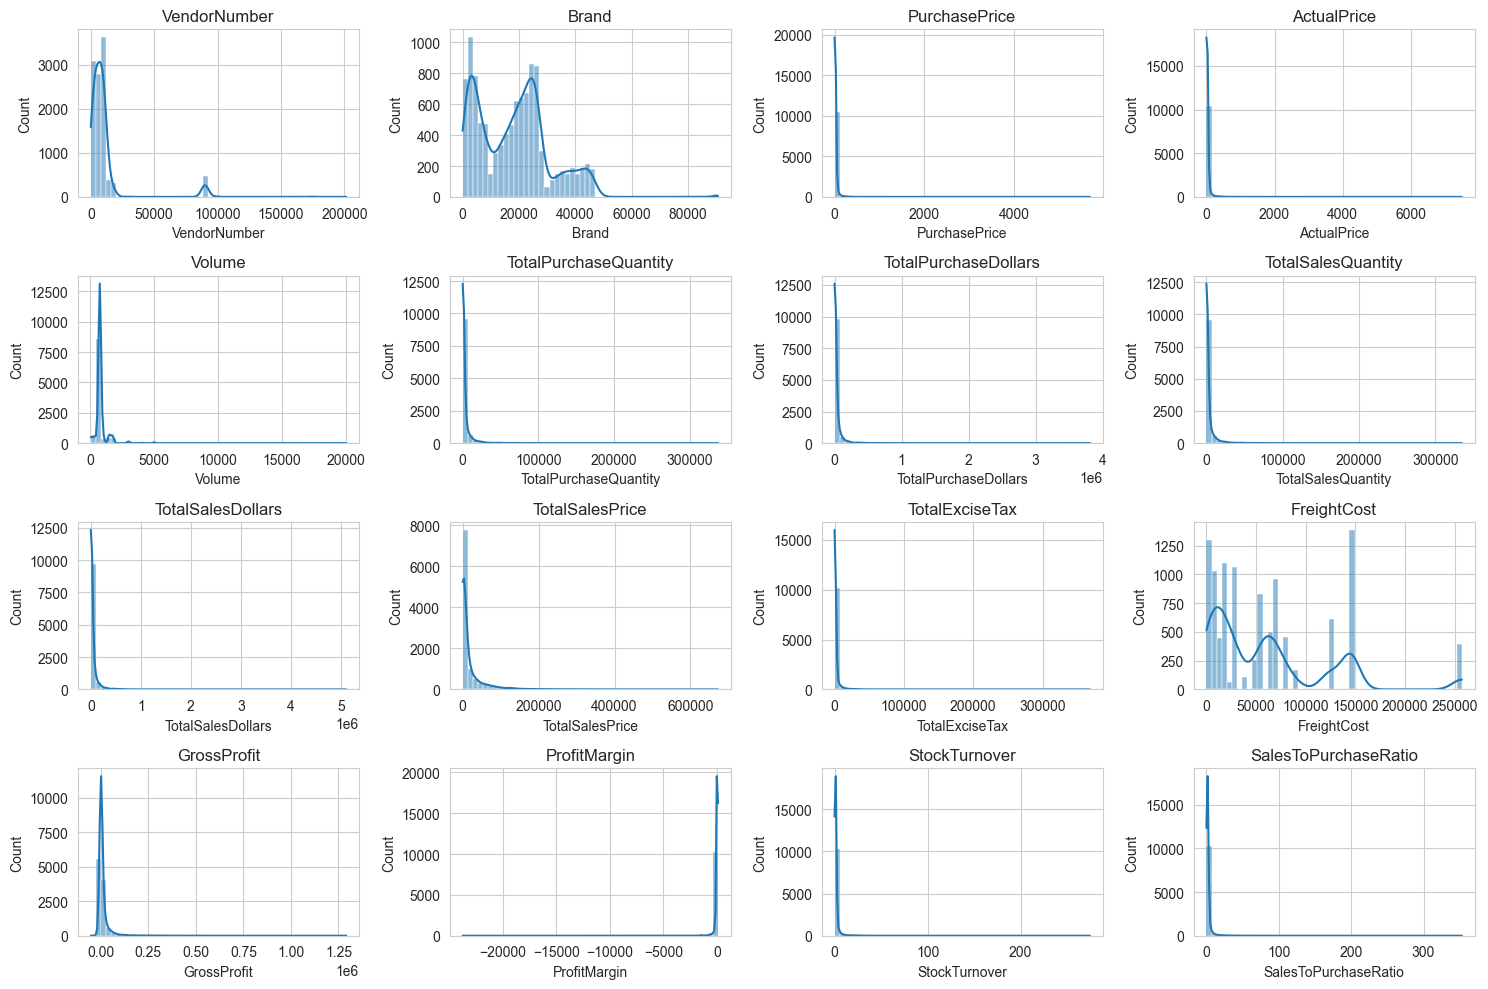

In [4]:
# Distribution Plots for Numerical Columns
import numpy as np
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()


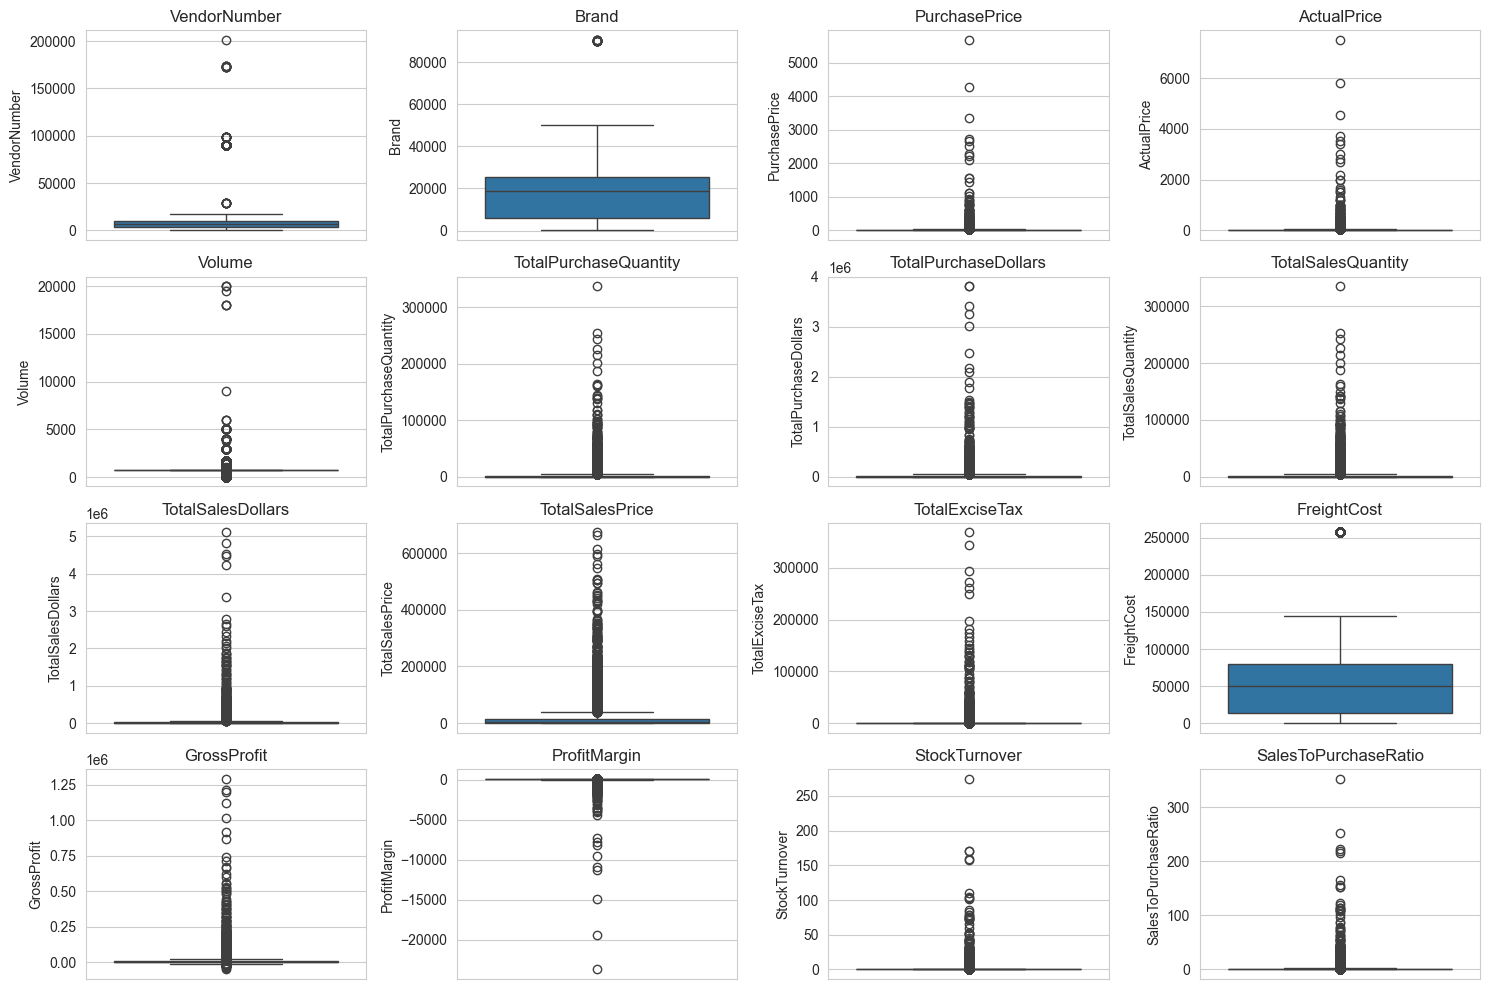

In [5]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
# let's filter the data by removing inconsistencies
import pandas as pd
df=pd.read_sql_query("""Select *
from vendor_sales_summary
where GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity >0""",conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


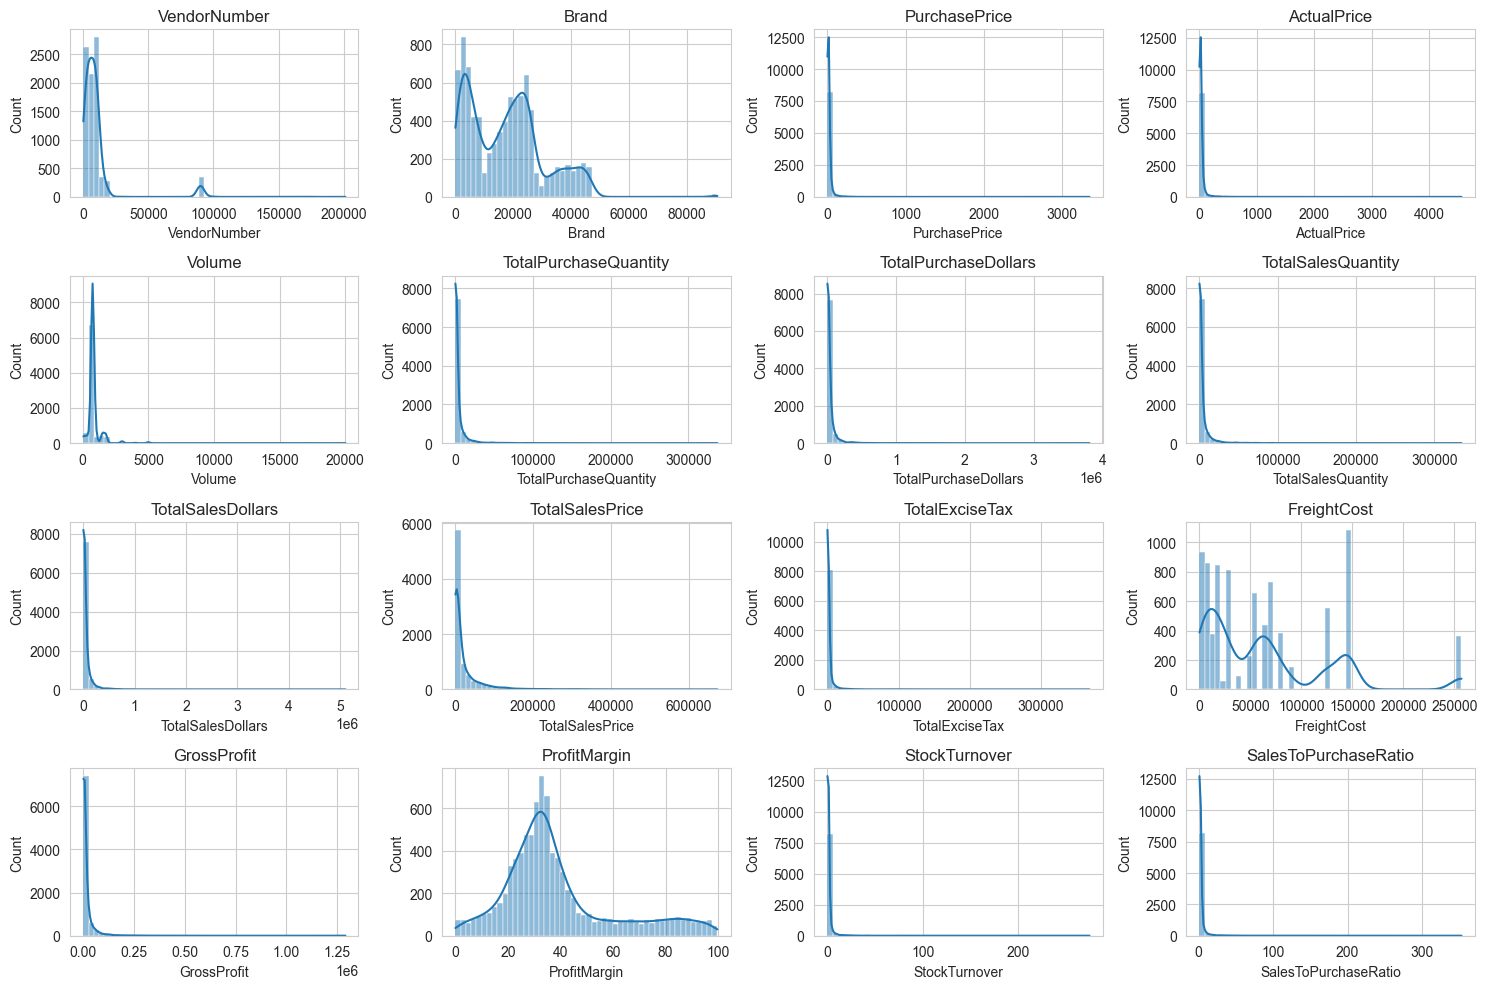

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()


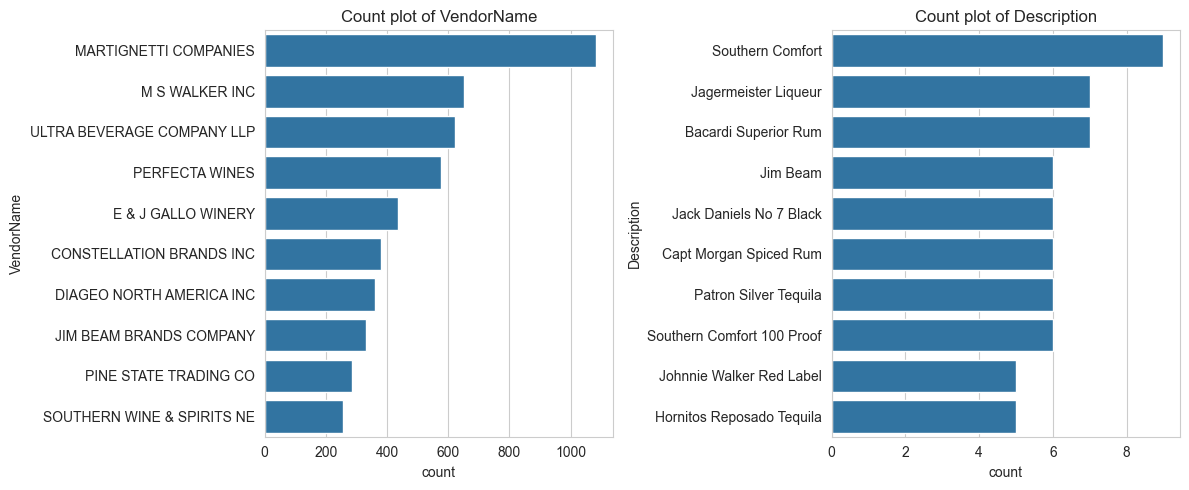

In [10]:
# Count plots for Categorical Columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,  col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

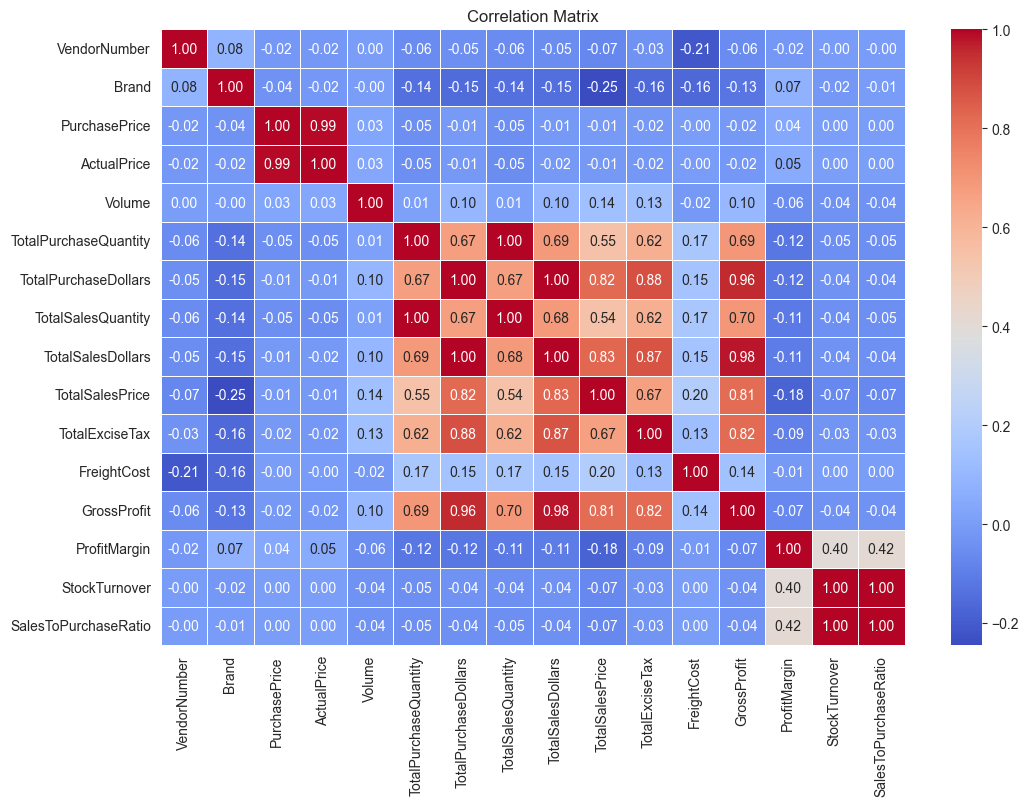

In [11]:
# Correlation Heatmaps
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", cmap="coolwarm",linewidth="0.5")
plt.title("Correlation Matrix")
plt.show()

In [12]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars' :'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [13]:
low_sales_threshhold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshhold=brand_performance['ProfitMargin'].quantile(0.85)


In [14]:
low_sales_threshhold

np.float64(560.299)

In [15]:
high_margin_threshhold

np.float64(64.97017552750113)

In [16]:
# Filter brands with low sales but high profit margins
target_brands=brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshhold) &
    (brand_performance['ProfitMargin']>=high_margin_threshhold)

]
print("Brands with low sales but high Profit Margins")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high Profit Margins


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

In [18]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
5,10 Span Pnt Nr CC,2441.74,25.836084
...,...,...,...
7695,Zonin Prosecco Brut,4382.28,31.290561
7696,Zorah Red,417.81,67.559417
7703,Zuccardi Q Malbec,1639.18,23.981503
7705,Zwack Liqueur,227.88,16.653502


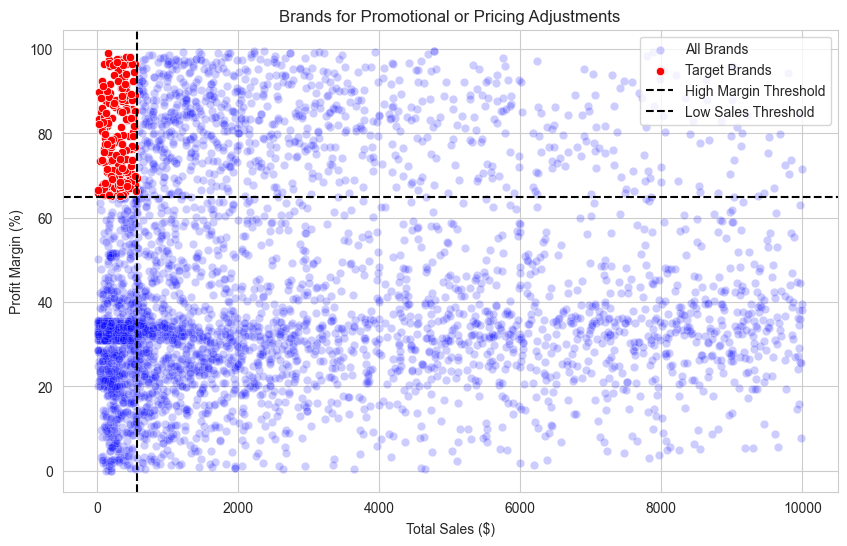

In [19]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    label="All Brands",
    alpha=0.2
)

sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="red",
    label="Target Brands"
)

# High margin threshold → horizontal line
plt.axhline(
    y=high_margin_threshhold,
    linestyle='--',
    color='black',
    label="High Margin Threshold"
)

# Low sales threshold → vertical line
plt.axvline(
    x=low_sales_threshhold,
    linestyle='--',
    color='black',
    label="Low Sales Threshold"
)

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value / 1_000_000:2f}M"
    elif value >=1_000:
        return f"{value / 1_000:2f}K"
    else:
        return str(value)


In [21]:
# Top vendors & Brands by sales Performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.964747M
Tito's Handmade Vodka      7.399658M
Grey Goose Vodka           7.209608M
Capt Morgan Spiced Rum     6.356321M
Absolut 80 Proof           6.244752M
Jameson Irish Whiskey      5.715760M
Ketel One Vodka            5.070084M
Baileys Irish Cream        4.150122M
Kahlua                     3.604859M
Tanqueray                  3.456698M
Name: TotalSalesDollars, dtype: object

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

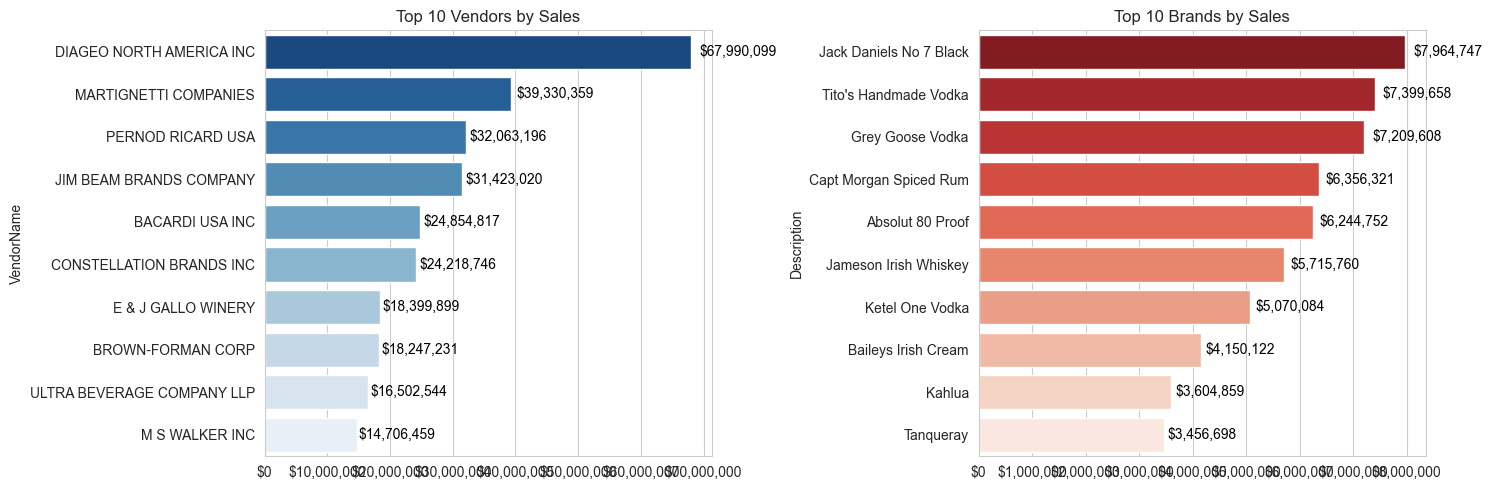

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# ---------- Formatter helpers ----------
def format_dollars_full(x, pos=None):
    try:
        return f"${x:,.0f}"
    except Exception:
        return str(x)

def format_dollars_short(x, pos=None):
    try:
        if abs(x) >= 1_000_000:
            return f"${x/1_000_000:.2f}M"
        if abs(x) >= 1_000:
            return f"${x/1_000:.1f}k"
        return f"${x:,.0f}"
    except Exception:
        return str(x)

# Choose label style: True -> "$7.96M", False -> "$7,964,747"
use_short_labels = False
axis_formatter = FuncFormatter(format_dollars_short if use_short_labels else format_dollars_full)
bar_label_func = (lambda v: format_dollars_short(v) if use_short_labels else format_dollars_full(v))

# ---------- Prepare series (safe conversions) ----------
# Make copies to avoid modifying original data outside this cell
top_vendors = top_vendors.copy()
top_brands  = top_brands.copy()

# Force index -> string (so seaborn treats them as categorical labels)
top_vendors.index = top_vendors.index.astype(str)
top_brands.index  = top_brands.index.astype(str)

# Ensure values are numeric floats (not objects)
top_vendors_values = top_vendors.values.astype(float)
top_brands_values  = top_brands.values.astype(float)

# ---------- Plot ----------
plt.figure(figsize=(15, 5))

# Plot for Top Vendors (left)
ax1 = plt.subplot(1, 2, 1)
sns.barplot(y=top_vendors.index, x=top_vendors_values, palette="Blues_r", ax=ax1)
ax1.set_title("Top 10 Vendors by Sales")

# Apply consistent axis formatter to x-axis
ax1.xaxis.set_major_formatter(axis_formatter)

# Add labels at end of bars (matching the axis format)
for bar in ax1.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax1.text(
        width + (width * 0.02),  # offset to the right
        y,
        bar_label_func(width),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Plot for Top Brands (right)
ax2 = plt.subplot(1, 2, 2)
sns.barplot(y=top_brands.index, x=top_brands_values, palette="Reds_r", ax=ax2)
ax2.set_title("Top 10 Brands by Sales")
ax2.xaxis.set_major_formatter(axis_formatter)

for bar in ax2.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax2.text(
        width + (width * 0.02),
        y,
        bar_label_func(width),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


In [28]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [29]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [30]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [31]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [32]:
# Display Top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.097226M,17.892873M,67.990099M,16.30
57,MARTIGNETTI COMPANIES,25.502096M,13.828264M,39.330359M,8.30
68,PERNOD RICARD USA,23.851164M,8.212032M,32.063196M,7.76
46,JIM BEAM BRANDS COMPANY,23.494304M,7.928716M,31.423020M,7.64
6,BACARDI USA INC,17.432020M,7.422797M,24.854817M,5.67
20,CONSTELLATION BRANDS INC,15.273708M,8.945038M,24.218746M,4.97
11,BROWN-FORMAN CORP,13.238939M,5.008291M,18.247231M,4.31
30,E & J GALLO WINERY,12.068539M,6.331360M,18.399899M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.167082M,5.335463M,16.502544M,3.63
53,M S WALKER INC,9.764313M,4.942146M,14.706459M,3.18


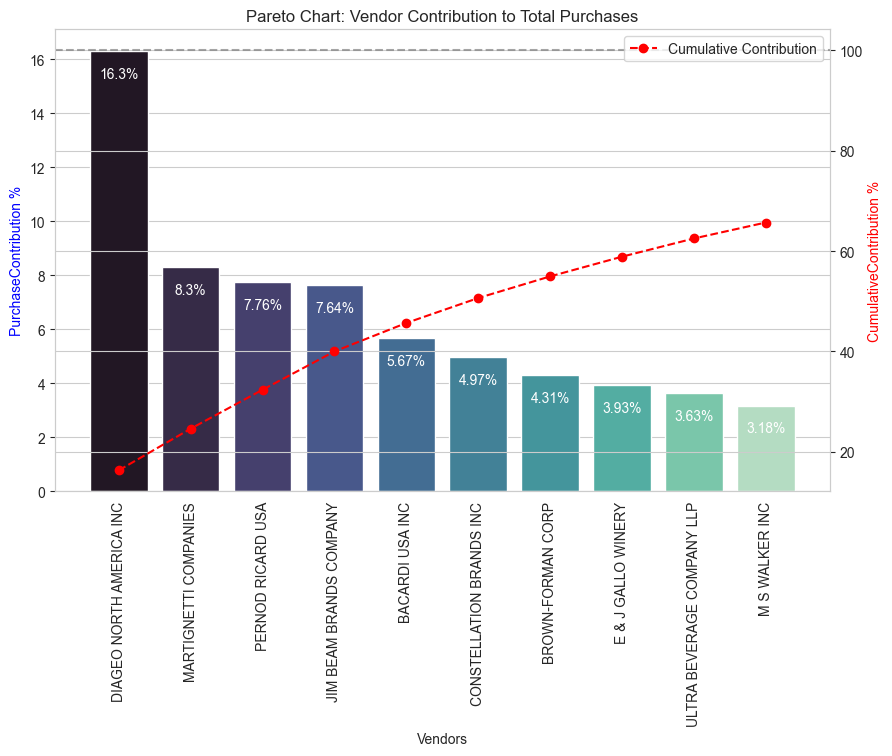

In [33]:

top_vendors['CumulativeContribution%'] = top_vendors ['PurchaseContribution%'].cumsum()
fig,ax1 =plt.subplots (figsize=(10, 6))
#Bar plot for Purchase Contribution
sns.barplot (x=top_vendors[ 'VendorName'], y=top_vendors ['PurchaseContribution%'], palette="mako", ax=ax1)
for i, value in enumerate (top_vendors ['PurchaseContribution%']):
     ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

ax2= ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors['CumulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution')
ax1.set_xticklabels (top_vendors [ 'VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution %', color='blue')
ax2.set_ylabel('CumulativeContribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline (y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2. legend (loc='upper right')

plt.show()




In [34]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


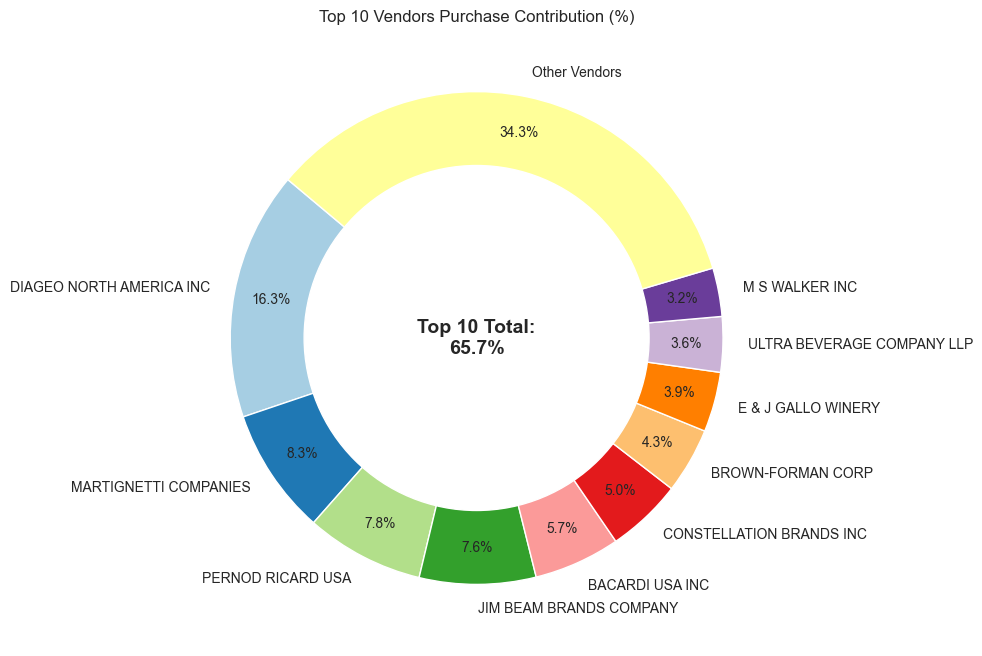

In [35]:
import matplotlib.pyplot as plt

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Only add "Other Vendors" if remaining is positive; clamp to 0 to avoid negatives
remaining_contribution = max(0, remaining_contribution)
if remaining_contribution > 0:
    vendors.append("Other Vendors")
    purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Option A: use a format-string with escaped percent sign
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%.1f%%',   # <-- fixed (note the double % to get a literal %)
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Option B (alternative): use a callable autopct
# wedges, texts, autotexts = ax.pie(
#     purchase_contributions,
#     labels=vendors,
#     autopct=lambda p: f"{p:.1f}%",  # no %-escaping needed
#     startangle=140,
#     pctdistance=0.85,
#     colors=plt.cm.Paired.colors
# )

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)

# Add Total Contribution annotation in the center
ax.text(0, 0, f"Top 10 Total:\n{total_contribution:.1f}%", ha='center', va='center', fontsize=14, fontweight='bold')

ax.set_title("Top 10 Vendors Purchase Contribution (%)")
plt.show()

In [36]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [37]:
df["OrderSize"]= pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [38]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [39]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


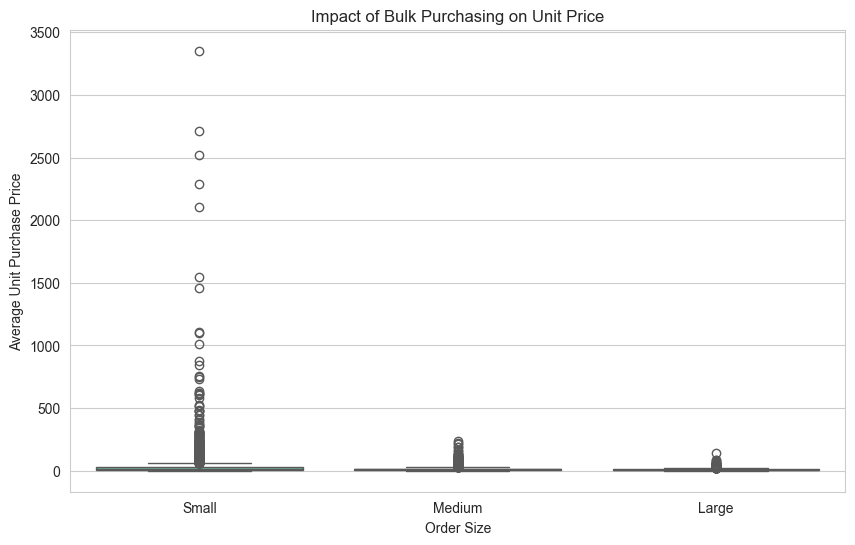

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [41]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [42]:
df["UnsoldInventoryValue"]=(df["TotalPurchaseQuantity"])-df["TotalSalesQuantity"]*df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -272326775.25


In [43]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the Highest locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']= inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
107,UNCORKED,-112.74
16,CAPSTONE INTERNATIONAL,-173.58
33,FANTASY FINE WINES CORP,-195.76000000000002
85,SILVER MOUNTAIN CIDERS,-205.46
44,"IRA GOLDMAN AND WILLIAMS, LLP",-421.48
0,ADAMBA IMPORTS INTL INC,-498.67999999999995
41,HIGHLAND WINE MERCHANTS LLC,-624.37
3,AMERICAN SPIRITS EXCHANGE,-721.32
35,FLAVOR ESSENCE INC,-1002.0
9,BLACK ROCK SPIRITS LLC,-1070.1000000000001


In [44]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [45]:
low_threshold

np.float64(1355.58)

In [46]:
top_threshold

np.float64(40622.1125)

In [47]:
top_vendors=df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<= low_threshold] ["ProfitMargin"].dropna()

In [48]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [49]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [50]:
def confidence_intervals(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical=stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_of_error=t_critical+std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

TopVendors 95% CI: (28.99,33.36,Mean:31.177912)
LowVendors 95% CI: (39.06,44.07,Mean:41.569170)


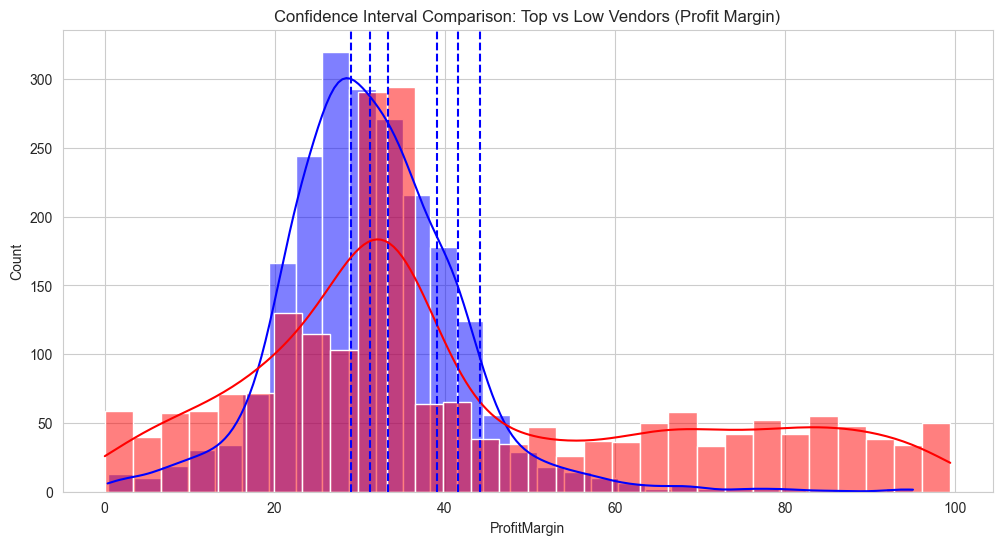

In [51]:
top_mean,top_lower,top_upper=confidence_intervals(top_vendors)
low_mean,low_lower,low_upper=confidence_intervals(low_vendors)

print(f"TopVendors 95% CI: ({top_lower:.2f},{top_upper:.2f},Mean:{top_mean:2f})")
print(f"LowVendors 95% CI: ({low_lower:.2f},{low_upper:.2f},Mean:{low_mean:2f})")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors,kde=True,color="blue",bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"Top Lower: {top_lower:.2f}%")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"Top Upper: {top_upper:.2f}%")
plt.axvline(top_mean,color="blue",linestyle="--",label=f"Top Mean: {top_mean:.2f}%")

#Low Vendors Plot
sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="Low Vendors")
plt.axvline(low_lower,color="blue",linestyle="--",label=f"Low Lower: {low_lower:.2f}%")
plt.axvline(low_upper,color="blue",linestyle="--",label=f"Low Upper: {low_upper:.2f}%")
plt.axvline(low_mean,color="blue",linestyle="--",label=f"Low Lower: {low_mean:.2f}%")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")

plt.show()

In [52]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendors=df[df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<= low_threshold] ["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print Results
print(f"T-Statistic: {t_stat:4f},P-value: {p_value:4f}")
if p_value<0.05:
    print("Reject H0:There is no significant difference in profit margins between top and low-performing vendors")
else:
    print("Fail to Reject H0: No significant difference in profit margins")

T-Statistic: -17.669523,P-value: 0.000000
Reject H0:There is no significant difference in profit margins between top and low-performing vendors
